<a href="https://colab.research.google.com/github/YogendraRanga/machine-learning/blob/main/laptop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/laptopPrice.csv")
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


In [ ]:
df.duplicated().sum()

21

In [ ]:
df.isnull().sum()

brand                0
processor_brand      0
processor_name       0
processor_gnrtn      0
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
os_bit               0
graphic_card_gb      0
weight               0
warranty             0
Touchscreen          0
msoffice             0
Price                0
rating               0
Number of Ratings    0
Number of Reviews    0
dtype: int64

In [ ]:
df['ram_gb'] = df['ram_gb'].str.replace('GB','')
df['hdd'] = df['hdd'].str.replace('GB','')
df['ssd']=df['ssd'].str.replace('GB','')
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4,DDR4,0,1024,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4,DDR4,0,1024,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4,DDR4,0,1024,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8,DDR4,512,0,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4,DDR4,0,512,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


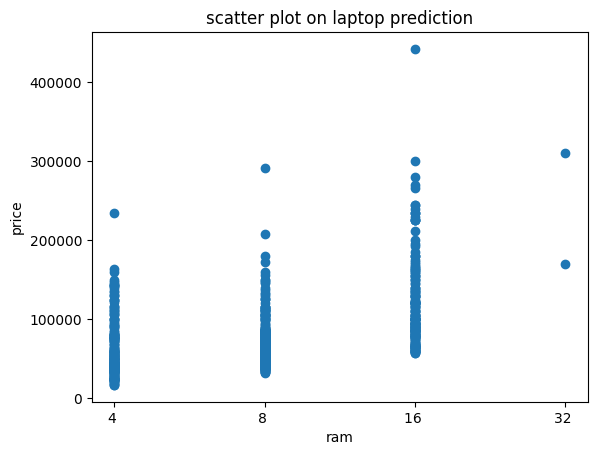

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=df['ram_gb'],y=df['Price'])
plt.xlabel("ram")
plt.ylabel("price")
plt.title("scatter plot on laptop prediction")
plt.show()

<Axes: >

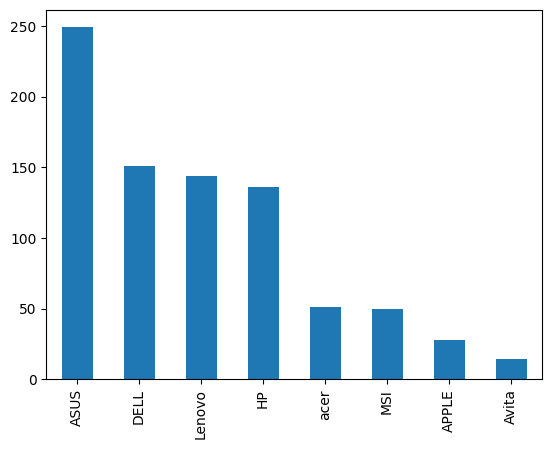

In [ ]:
df['brand'].value_counts().plot(kind='bar')

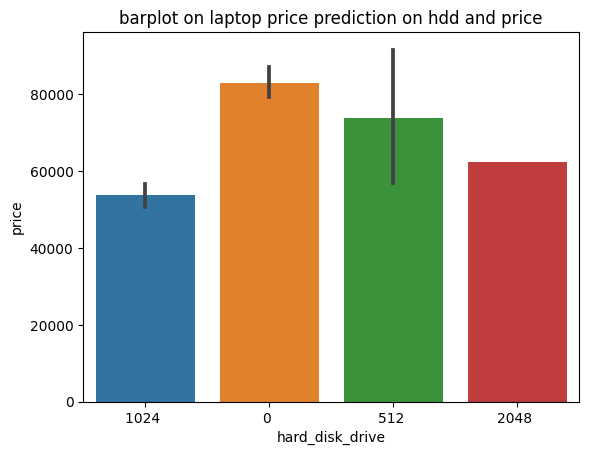

In [ ]:
import seaborn as sns
sns.barplot(x=df['hdd'],y=df['Price'])
plt.xlabel("hard_disk_drive")
plt.ylabel("price")
plt.title("barplot on laptop price prediction on hdd and price")
plt.show()

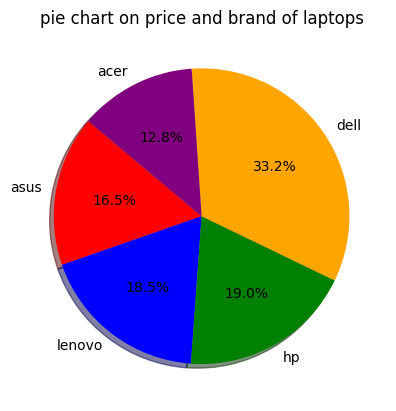

In [ ]:
data=df['Price'].head()
labels=['asus','lenovo','hp','dell','acer']
colors=['red','blue','green','orange','purple']
plt.pie(data,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=140)
plt.title("pie chart on price and brand of laptops")
plt.show()

<ipython-input-12-4e77f9a7091f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

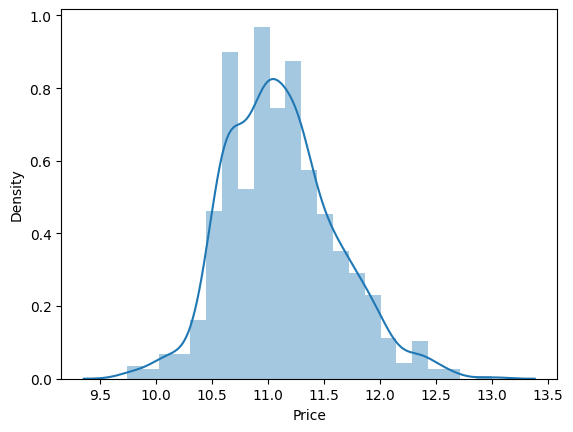

In [ ]:
import seaborn as sns
sns.distplot(np.log(df['Price']))

In [ ]:
x=df[['hdd','ram_gb','ssd']]
x

,hdd,ram_gb,ssd
0,1024,4,0
1,1024,4,0
2,1024,4,0
3,0,8,512
4,512,4,0
...,...,...,...
818,0,4,1024
819,0,4,1024
820,0,4,1024
821,0,4,1024


In [ ]:
y=df['Price']
y

0       34649
1       38999
2       39999
3       69990
4       26990
        ...  
818    135990
819    144990
820    149990
821    142990
822     57490
Name: Price, Length: 823, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(x_train,y_train)
from sklearn.metrics import r2_score,mean_absolute_error

In [ ]:
model.predict(pd.Series(x_test[:,0].values.reshape(-1,1)))

In [ ]:
model.score(x_test,y_test)

0.5166197441596091

In [ ]:
a=r2_score(y_test,y_pred)
a

0.4726307968347866

In [ ]:
b=mean_absolute_error(y_test,y_pred)
b

19985.23935805948

In [ ]:
from sklearn.svm import SVC
model1=SVC()
model1.fit(x_test,y_test)
y_pred=model.predict(x_test)
print(model1.score(x_test,y_test))
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.05454545454545454
0.5998921889504355
16862.143427260275


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor()
model.fit(x_test,y_test)
y_pred=model.predict(x_test)
print(model.score(x_test,y_test))
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.5994770694837694
0.5994770694837694
16956.319304515808
